<a href="https://colab.research.google.com/github/AUMANSH/Data-Science-Projects/blob/main/LSTM_Stock_Price_Prediction_of_APPLE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,Embedding
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/HistoricalQuotes1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2518 non-null   object 
 1   Close/Last   2518 non-null   float64
 2    Volume      2518 non-null   int64  
 3    Open        2518 non-null   object 
 4    High        2518 non-null   object 
 5    Low         2518 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 118.2+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.isnull().sum())

Date           0
Close/Last     0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64


In [ ]:
df = df.drop(['Date',' Open',' High',' Low',' Volume'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close/Last   2518 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [ ]:
close = df.iloc[:, 0].values.reshape(-1,1)

# normalize to make training fast and stable
Scalar = MinMaxScaler()
close = Scalar.fit_transform(close)

print(close)

[[8.18940005e-01]
 [8.19478074e-01]
 [8.83810869e-01]
 ...
 [2.01775626e-04]
 [0.00000000e+00]
 [6.72585418e-05]]


In [ ]:
window_size = 20 #window size badha sakte h => Better performance k liye

def create_datset(data,window_size):
  X,y= [],[]
  for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  return np.array(X),np.array(y)

X,y=create_datset(close,window_size)
X = X.reshape(X.shape[0],X.shape[1],1)

print(X)

[[[8.18940005e-01]
  [8.19478074e-01]
  [8.83810869e-01]
  ...
  [9.71919559e-01]
  [9.37651332e-01]
  [9.40509820e-01]]

 [[8.19478074e-01]
  [8.83810869e-01]
  [8.68442292e-01]
  ...
  [9.37651332e-01]
  [9.40509820e-01]
  [9.88801453e-01]]

 [[8.83810869e-01]
  [8.68442292e-01]
  [9.02407856e-01]
  ...
  [9.40509820e-01]
  [9.88801453e-01]
  [9.90382029e-01]]

 ...

 [[1.25437181e-02]
  [1.29472693e-02]
  [1.12994350e-02]
  ...
  [4.90987355e-03]
  [4.84261501e-03]
  [8.74361044e-04]]

 [[1.29472693e-02]
  [1.12994350e-02]
  [1.05932203e-02]
  ...
  [4.84261501e-03]
  [8.74361044e-04]
  [2.01775626e-04]]

 [[1.12994350e-02]
  [1.05932203e-02]
  [8.54183481e-03]
  ...
  [8.74361044e-04]
  [2.01775626e-04]
  [0.00000000e+00]]]


In [ ]:
print(y)

[[9.88801453e-01]
 [9.90382029e-01]
 [9.68018563e-01]
 ...
 [2.01775626e-04]
 [0.00000000e+00]
 [6.72585418e-05]]


In [ ]:
X.shape

(2498, 20, 1)

In [ ]:
y.shape

(2498, 1)

In [ ]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(84))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 20, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 84)             │        71,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,213 (539.89 KB)

 Trainable params: 138,213 (539.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.fit(
    X_train, y_train,
    epochs=50, #j yada epochs = improve accuracy
    batch_size=300,
    validation_data=(X_test, y_test)
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 8.2088e-04 - val_mse: 8.2088e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 7.7420e-04 - val_mse: 7.7420e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 6.4782e-04 - val_mse: 6.4782e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2411e-04 - mse: 5.2411e-04 - val_loss: 2.9004e-04 - val_mse: 2.9004e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.6263e-04 - mse: 3.6263e-04 - val_loss: 4.7159e-05 - val_mse: 4.7159e-05
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.0344e-04 - mse: 3.0344e-04 - val_loss: 6.9758e-05 - val_mse: 6.9758e-05
Epoch 9

In [ ]:
model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5282e-05 - mse: 5.5282e-05


[3.811678834608756e-05, 3.811678834608756e-05]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


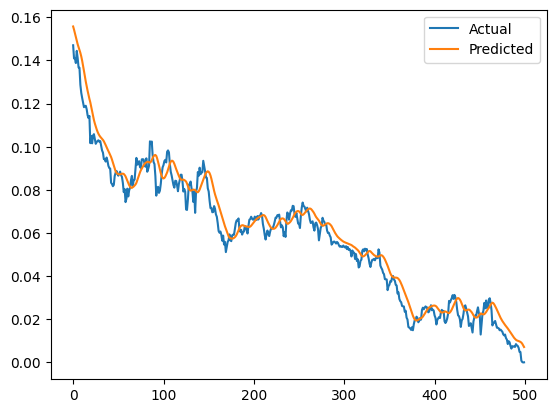

In [ ]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5282e-05 - mse: 5.5282e-05
Test MSE: 3.811678834608756e-05


In [ ]:
# Inverse scale karke original price me convert kar
y_pred_original = Scalar.inverse_transform(y_pred)
y_test_original = Scalar.inverse_transform(y_test)

In [ ]:
print(y_pred.shape)  # should be (n, 1)
print(y_test.shape)


(500, 1)
(500, 1)


In [ ]:
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [ ]:
# Kuch predictions aur actual values print kar
for i in range(5):
    print(f"Predicted: {y_pred_original[i][0]:.2f}, Actual: {y_test_original[i][0]:.2f}")

Predicted: 76.14, Actual: 73.55
Predicted: 75.69, Actual: 71.73
Predicted: 75.19, Actual: 71.74
Predicted: 74.66, Actual: 71.10
Predicted: 74.13, Actual: 72.78
